<a href="https://colab.research.google.com/github/SANDESHAHAHA/Data-science2/blob/main/Bank_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/content/Bank Customer Churn Prediction.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
5082,15793307,724,Spain,Female,41,4,142880.28,3,0,0,185541.20,1
6595,15734948,601,Spain,Male,24,7,0.00,2,0,0,144660.42,0
1173,15808182,478,Spain,Female,36,3,92363.30,2,1,0,44912.70,0
5236,15645184,701,France,Male,29,2,0.00,2,1,0,176943.59,0
6258,15726046,712,France,Female,27,2,133009.51,1,1,0,126809.15,0


In [5]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.drop('customer_id',axis=1,inplace=True)

In [8]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [10]:
for col in df:
  print(f'{col}: {df[col].unique()}')

credit_score: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [11]:
df['gender'].replace({'Male':1,'Female':0},inplace=True)

<ipython-input-11-1871157913>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Male':1,'Female':0},inplace=True)
<ipython-input-11-1871157913>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Male':1,'Female':0},inplace=True)


In [12]:
df['age']=df['age']/100

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  float64
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 859.5+ KB


In [14]:
df1=pd.get_dummies(df['country'],drop_first=True).astype(int)

In [15]:
df.drop('country',axis=1,inplace=True)

In [16]:
ndf=pd.concat([df,df1],axis=1)

In [17]:
for col in ndf:
  print(f'{col}: {ndf[col].unique()}')

credit_score: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
ndf[['credit_score','products_number','estimated_salary','balance']]=scaler.fit_transform(ndf[['credit_score','products_number','estimated_salary','balance']])


In [19]:
ndf.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Germany,Spain
0,0.538,0,0.42,2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,0,0.41,1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,0,0.42,8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,0,0.39,1,0.000000,0.333333,0,0,0.469120,0,0,0
4,1.000,0,0.43,2,0.500246,0.000000,1,1,0.395400,0,0,1


In [20]:
print(ndf['balance'].isnull().sum())

0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=ndf.drop('churn',axis=1)
y=ndf['churn']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
X_train.shape

(8000, 11)

In [26]:
X_train.shape


(8000, 11)

In [27]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(11,),activation='relu'),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7852 - loss: 0.5099
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7894 - loss: 0.4750
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8044 - loss: 0.4528
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8147 - loss: 0.4347
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8262 - loss: 0.4060
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8426 - loss: 0.3743
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8495 - loss: 0.3590
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8533 - loss: 0.3580
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8538 - loss: 0.3541
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.3552
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8539 - loss: 0.3545
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [28]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8127 - loss: 0.7099


[0.7528400421142578, 0.815500020980835]

In [29]:
model.evaluate(X_train,y_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9278 - loss: 0.1650


[0.1587982028722763, 0.9338750243186951]

In [30]:
yp=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [31]:
yp[:10]

array([[4.68231434e-07],
       [9.30647445e-07],
       [2.44136564e-02],
       [2.15713182e-04],
       [2.18508765e-02],
       [6.80532889e-04],
       [7.38584250e-02],
       [2.35521138e-01],
       [3.10828537e-01],
       [1.00010514e-01]], dtype=float32)

In [32]:
yp=(yp>0.5).astype(int)

In [33]:
yp[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [34]:
y_test[:10]

,churn
6252,0
4684,0
1731,0
4742,0
4521,0
6340,0
576,0
5202,1
6363,0
439,0


In [35]:
y_test.shape

(2000,)

In [36]:
yp.shape

(2000, 1)

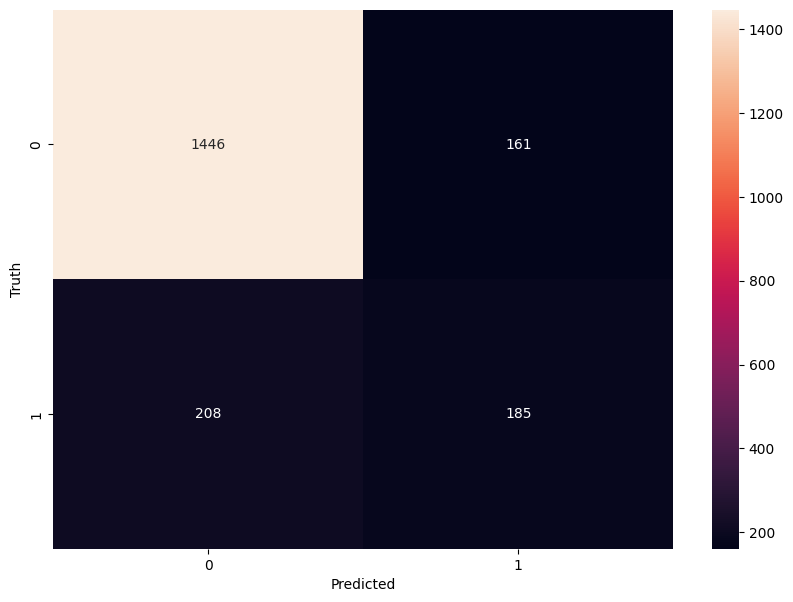

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
classification_report(y_test,yp)

cm=tf.math.confusion_matrix(labels=y_test,predictions=yp)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [48]:
print(confusion_matrix(y_test,yp))

[[1446  161]
 [ 208  185]]
